In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set(style="white")


In [2]:
class LogisticRegression:
    def __init__(self,  learningrate, tolerance, 
                 maxIteration=50000):
        self.learningrate = learningrate
        self.tolerance = tolerance
        self.maxIteration = maxIteration

        
    def dataset_reader(self):
        train_df = pd.read_excel(r'../dataset/Lab3_data.xlsx', sheet_name='2004--2005 Data')
        test_df = pd.read_excel(r'../dataset/Lab3_data.xlsx', sheet_name='2004--2007 Data')
        train_df, test_df = np.array(train_df, dtype=np.float64), np.array(test_df, dtype=np.float64)
        
        if self.remove_points:
            print(f"Removing points at indices: {self.remove_points}")
            train_df = np.delete(train_df, self.remove_points, 0)
            print(f"Remaining training data shape: {train_df.shape}")
            
        X_train, y_train = train_df[:, 1:], train_df[:, 0]
        X_test, y_test = test_df[:, 1:], test_df[:, 0]
        return X_train, X_test, y_train, y_test
    
    def add_x0(self, X):
        """
        @X: numpy matrix, dataset
        @does: add x0 to data
        @return: numpy matrix
        """
        return np.column_stack([np.ones([X.shape[0], 1]), X])   
    
    
    def sigmoid(self, z):
        
        sig = 1 / (1 + np.exp(-z))
        return sig
    
    
    def cost_function(self, X, y):
        
        # Either:
#         sig = self.sigmoid(X.dot(self.w))
#         pred = y * np.log(sig) + (1-y) * np.log(1 - sig) # after applying log on the P(D)
#         cost = - pred.sum()
        
        #or:
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y) #negative log likelihood
        cost = pred_.sum()
        return cost

    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X) # gradient of LR 
        return grad
    
    
    def gradient_descent(self, X, y):
        """
        @X: numpy matrix, dataset
        @w: numpy array, weights
        @y: numpy array, output value
        @learningrate: float, learning rate for cross validation
        @tolerance: float, threshold for the tolerance limit
        @maxIteration: int, maximum number of iteration for gradient descent
        @does: implement gradient descent to calculate w
        @return: numpy array, float
        """
        cost_sequence = []

        last = float('inf')

        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningrate * self.gradient(X, y)
            cur = self.cost_function(X, y)
            diff = last - cur
            last = cur
            cost_sequence.append(cur)
            if diff < self.tolerance:
                print("The model stopped - no further improvment")
                break

        self.plot_cost(cost_sequence)
        return    

    def plot_cost(self, cost_sequence):
        # Data for plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
               title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()
    
    def predict(self, X):
        """
        @X: numpy matrix, dataset
        @w: numpy array, weights
        @does: predict y_hat using X and w
        @return: numpy array
        """
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    # evaluate the prediction
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)

        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()

        return accuracy, precision, recall
    
    # Run the model 
    def run_model(self, remove_points = None):
        """
        @dataset: numpy matrix, dataset
        @learningrate: float, learning rate for cross validation
        @tolerance: float, threshold for the tolerance limit
        @folds: int, maximum number of folds
        @does: k fold cross validation
        @return: numpy array, float
        """
        if remove_points is not None:
            remove_points = [i - 1 for i in remove_points]  # Adjust for zero-based indexing
        self.remove_points = remove_points
        self.X_train, self.X_test, self.y_train, self.y_test = self.dataset_reader()
        
        print('Solving using gradient descent')
        self.w = np.ones(self.X_train.shape[1], dtype=np.float64) * 0
        self.gradient_descent(self.X_train, self.y_train)
        print()
        
        y_hat_train = self.predict(self.X_train)
        accuracy, precision, recall = self.evaluate(self.y_train, y_hat_train)
        print('Evaluation for training data:')
        print()
        print('theta_values: ', self.w)
        print('Accuracy: ', accuracy)
        print('Precision: ', precision)
        print('Recall: ', recall)
       
        print() 
        
        y_hat_test = self.predict(self.X_test)
        test_accuracy, test_precision, test_recall = self.evaluate(self.y_test, y_hat_test)
        print('Evaluation for test data:')
        print()
        print('theta_values: ', self.w)
        print('Accuracy: ', test_accuracy)
        print('Precision: ', test_precision)
        print('Recall: ', test_recall)
                
        return accuracy, precision, recall, test_accuracy, test_precision, test_recall
        
        
        
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
        
#   -----------------------------------------------------plots for test dataset------------------------------------

    def plot_test(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_test[:, 0], self.X_test[:, 1], 
                     self.sigmoid(self.X_test.dot(self.w)), 
                     c = self.y_test[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt_test(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_test[:, 0], self.X_test[:, 1], 
                   c=self.y_test[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D_test(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_test[:, 0], self.X_test[:, 1], 
                   c=self.y_test[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
    

In [3]:
train_df = pd.read_excel(r'../dataset/Lab3_data.xlsx', sheet_name='2004--2005 Data', engine = 'openpyxl')


In [4]:
train_df.shape


(46, 3)

In [5]:
test_df = pd.read_excel(r'../dataset/Lab3_data.xlsx', sheet_name='2004--2007 Data')


In [6]:
test_df.shape

(95, 3)

### Training the model and evaluating on train and test data without removing any points

#### (1) Plots for Train Dataset(without removing points)

Results without removing any points:
Solving using gradient descent


100%|██████████| 10000/10000 [00:00<00:00, 45679.14it/s]
C:\Users\saurabh.LAPTOP-2HELHMCR\AppData\Local\Temp\ipykernel_22504\1604114609.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)


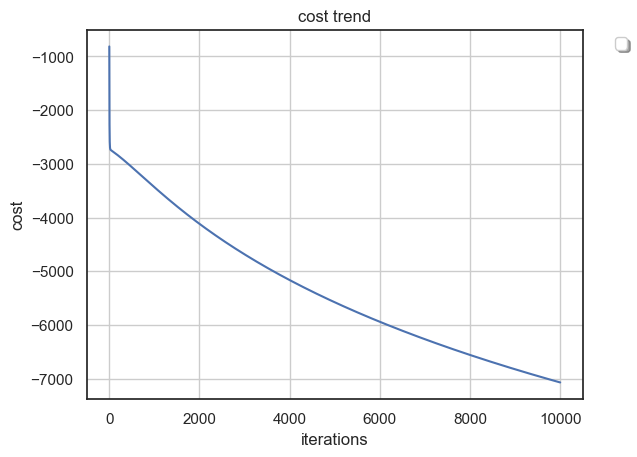


Evaluation for training data:

theta_values:  [-0.28014363  0.13767497]
Accuracy:  0.9347826086956522
Precision:  0.9459459459459459
Recall:  0.9722222222222222

Evaluation for test data:

theta_values:  [-0.28014363  0.13767497]
Accuracy:  0.8842105263157894
Precision:  0.9090909090909091
Recall:  0.9459459459459459

Train Metrics (without removing points): (np.float64(0.9347826086956522), np.float64(0.9459459459459459), np.float64(0.9722222222222222))
Test Metrics (without removing points): (np.float64(0.8842105263157894), np.float64(0.9090909090909091), np.float64(0.9459459459459459))

Plots for Train Dataset(without removing points)



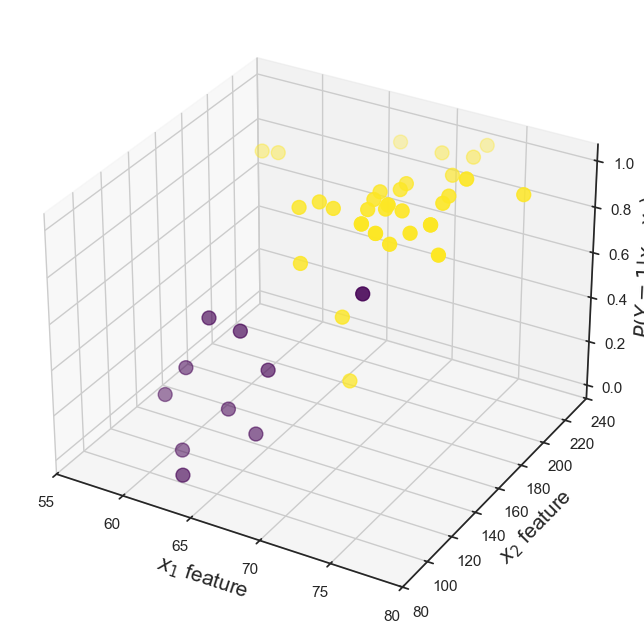

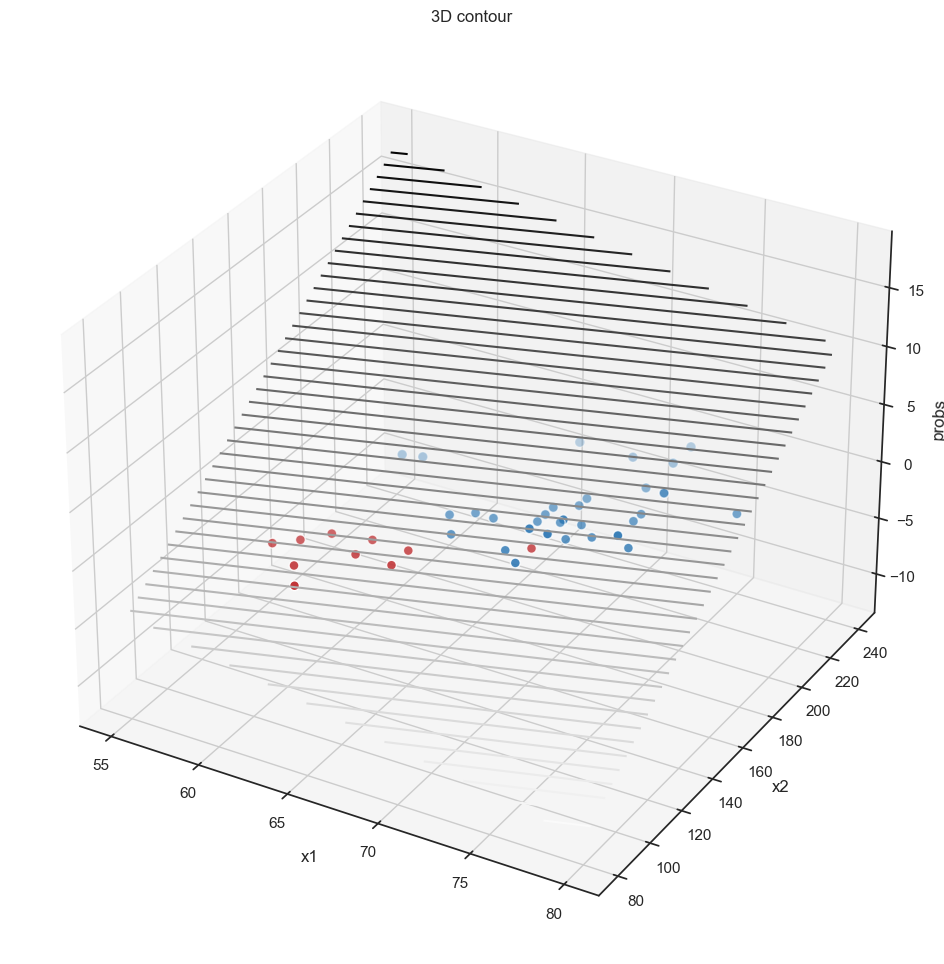

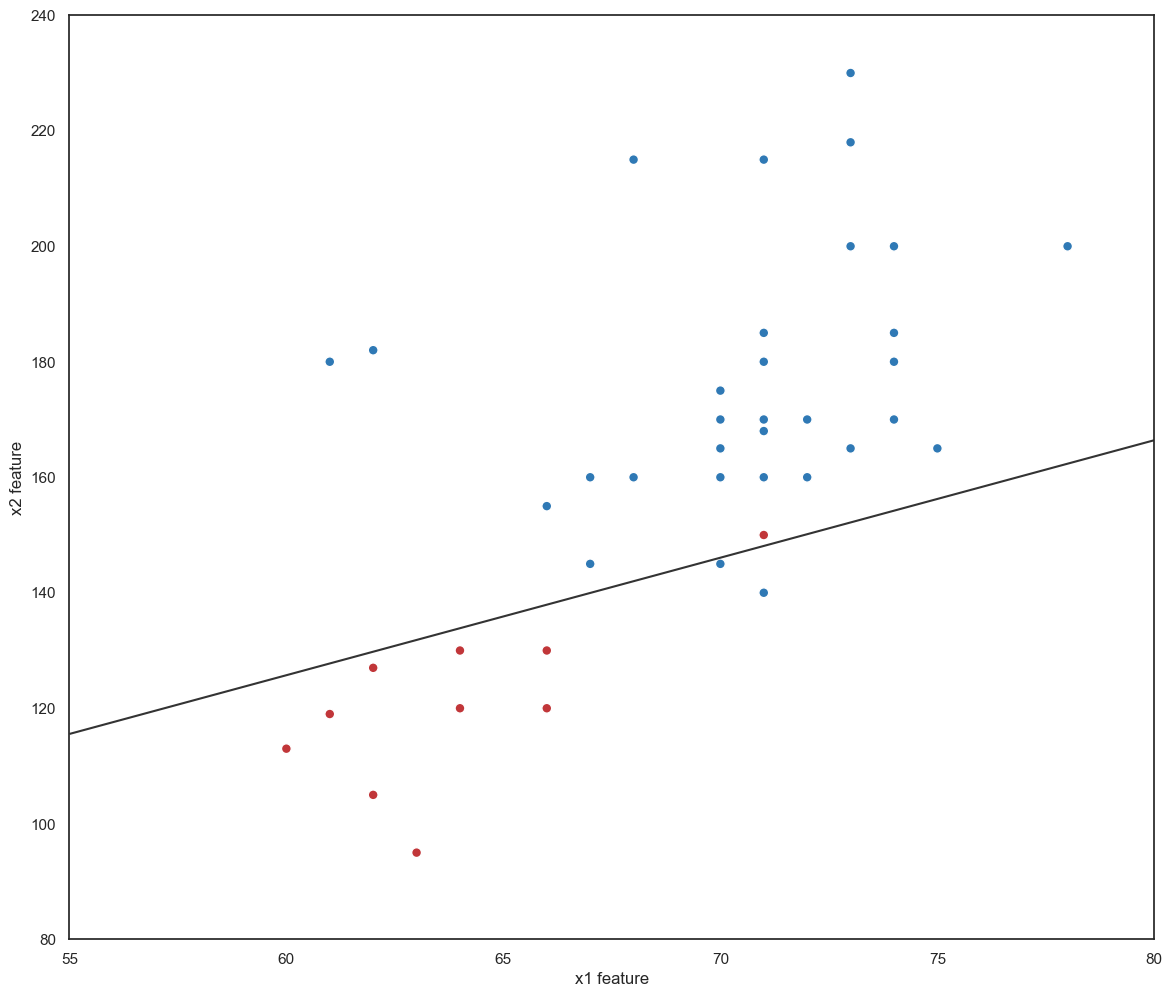

In [12]:
# Creating an instance of the LogisticRegression class
lr = LogisticRegression(learningrate=0.1e-5, tolerance=0.005, maxIteration=10000)

# Training the model and evaluating on test data without removing any points
print("Results without removing any points:")
train_metrics = lr.run_model()
print()
print("Train Metrics (without removing points):", train_metrics[:3])
print("Test Metrics (without removing points):", train_metrics[3:])

print()
print('Plots for Train Dataset(without removing points)')
print()      
lr.plot()
lr.plot3D()
lr.scatterPlt()



#### (2) Plots for Test Dataset(without removing points)

Plots for Test Dataset (without removing points)



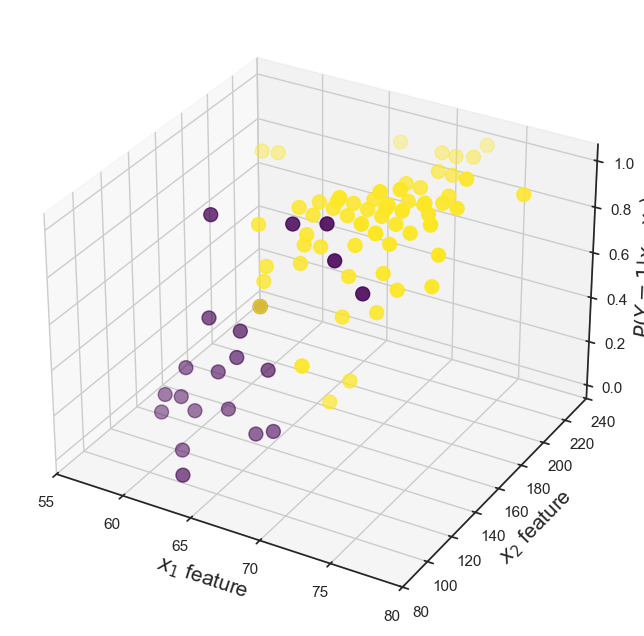

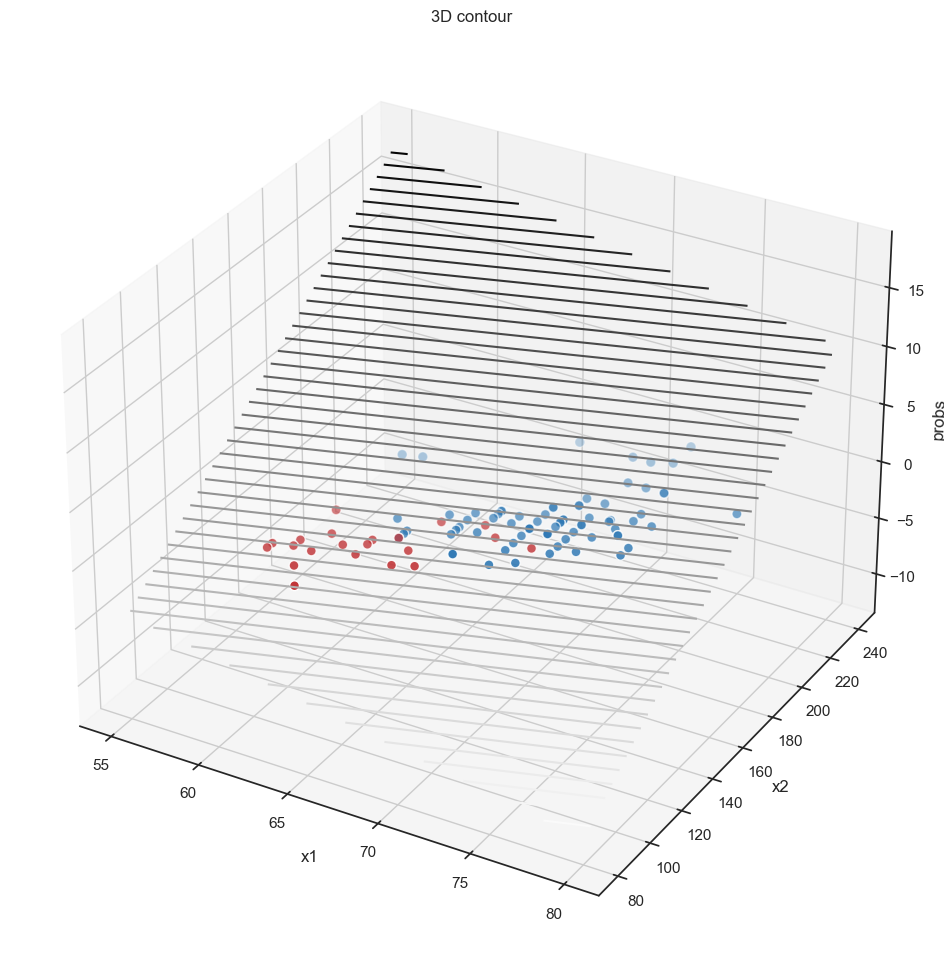

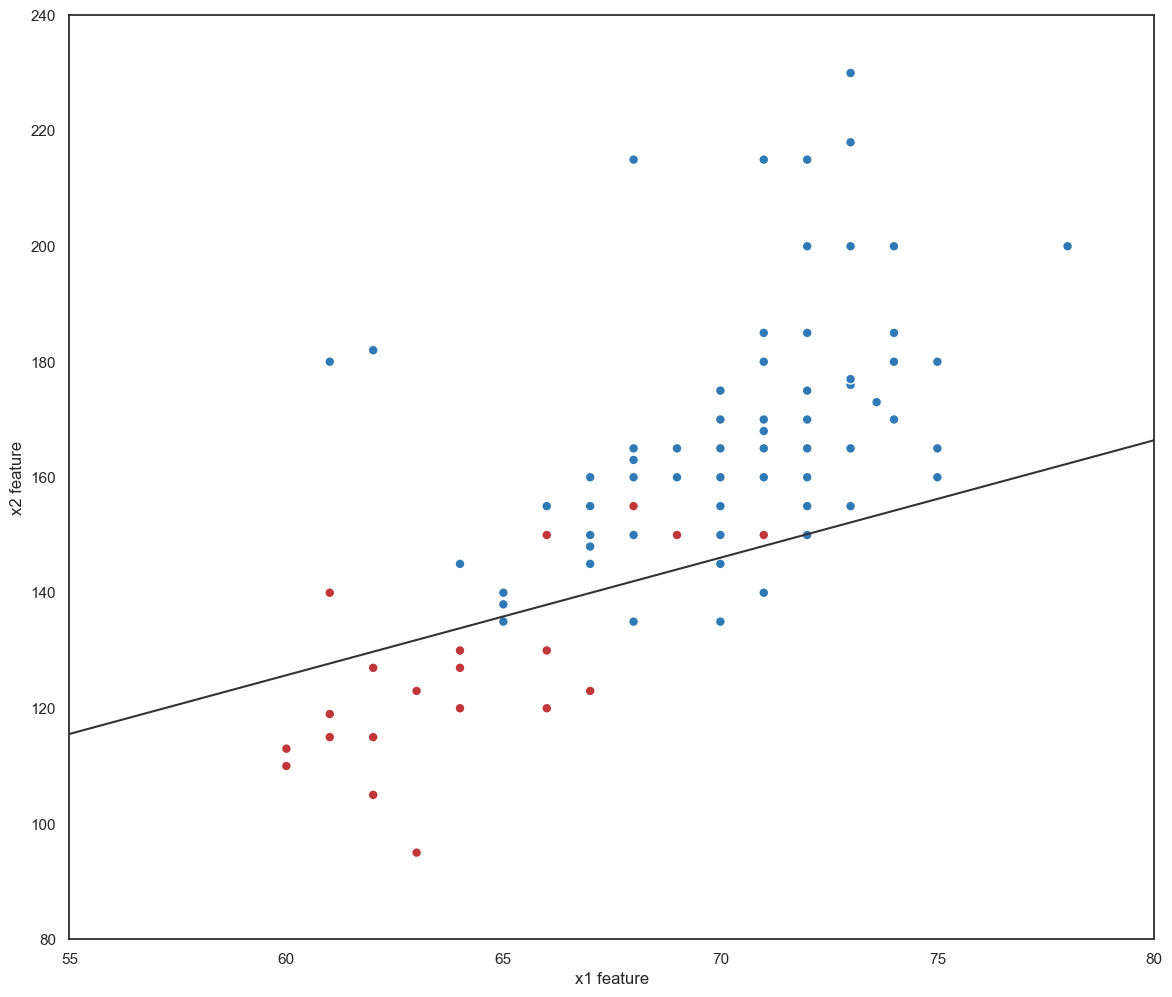

In [13]:
print('Plots for Test Dataset (without removing points)')
print()      
lr.plot_test()
lr.plot3D_test()
lr.scatterPlt_test() 

### Training the model and evaluating on train and test data after removing points 1 and 39

#### (1) Plots for Train Dataset(removing points)


Results after removing points 1 and 39:
Removing points at indices: [0, 38]
Remaining training data shape: (44, 3)
Solving using gradient descent


100%|██████████| 10000/10000 [00:00<00:00, 37842.78it/s]
C:\Users\saurabh.LAPTOP-2HELHMCR\AppData\Local\Temp\ipykernel_22504\1604114609.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)


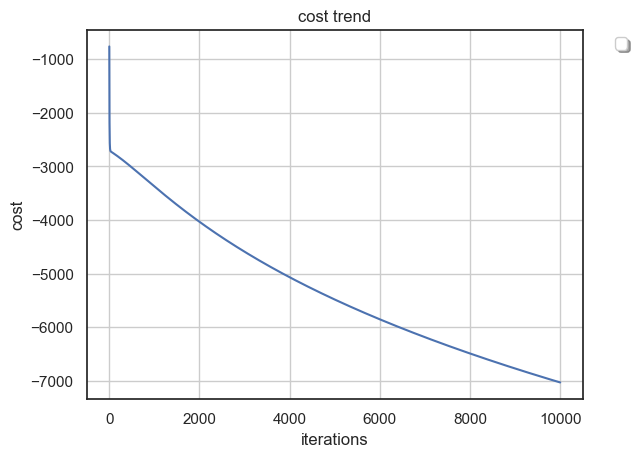


Evaluation for training data:

theta_values:  [-0.29127103  0.14305931]
Accuracy:  0.9772727272727273
Precision:  0.9722222222222222
Recall:  1.0

Evaluation for test data:

theta_values:  [-0.29127103  0.14305931]
Accuracy:  0.8842105263157894
Precision:  0.9090909090909091
Recall:  0.9459459459459459

Train Metrics (after removing points): (np.float64(0.9772727272727273), np.float64(0.9722222222222222), np.float64(1.0))
Test Metrics (after removing points): (np.float64(0.8842105263157894), np.float64(0.9090909090909091), np.float64(0.9459459459459459))

Plots for Train Dataset(removing points)



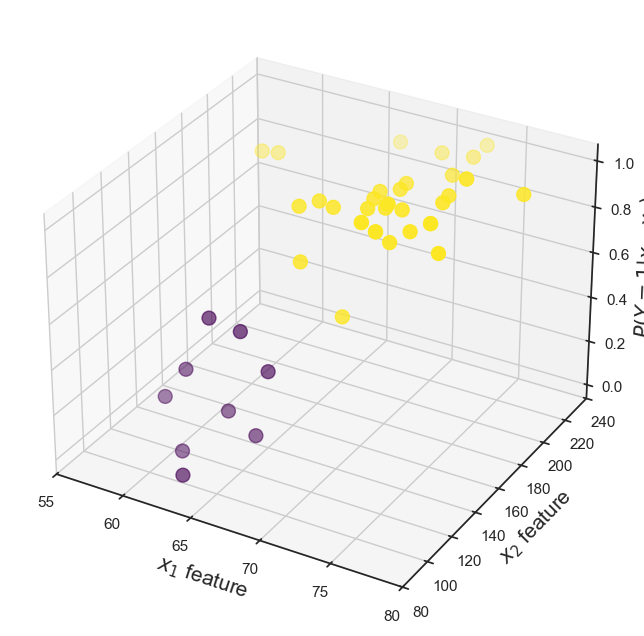

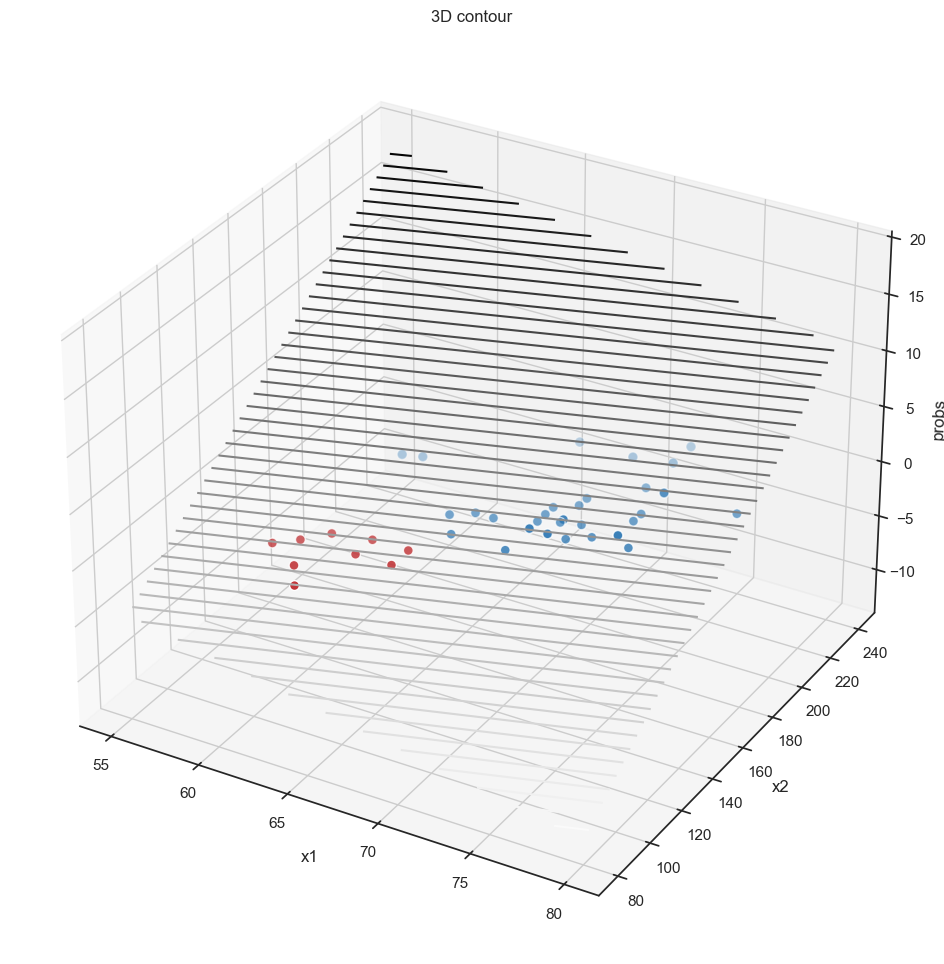

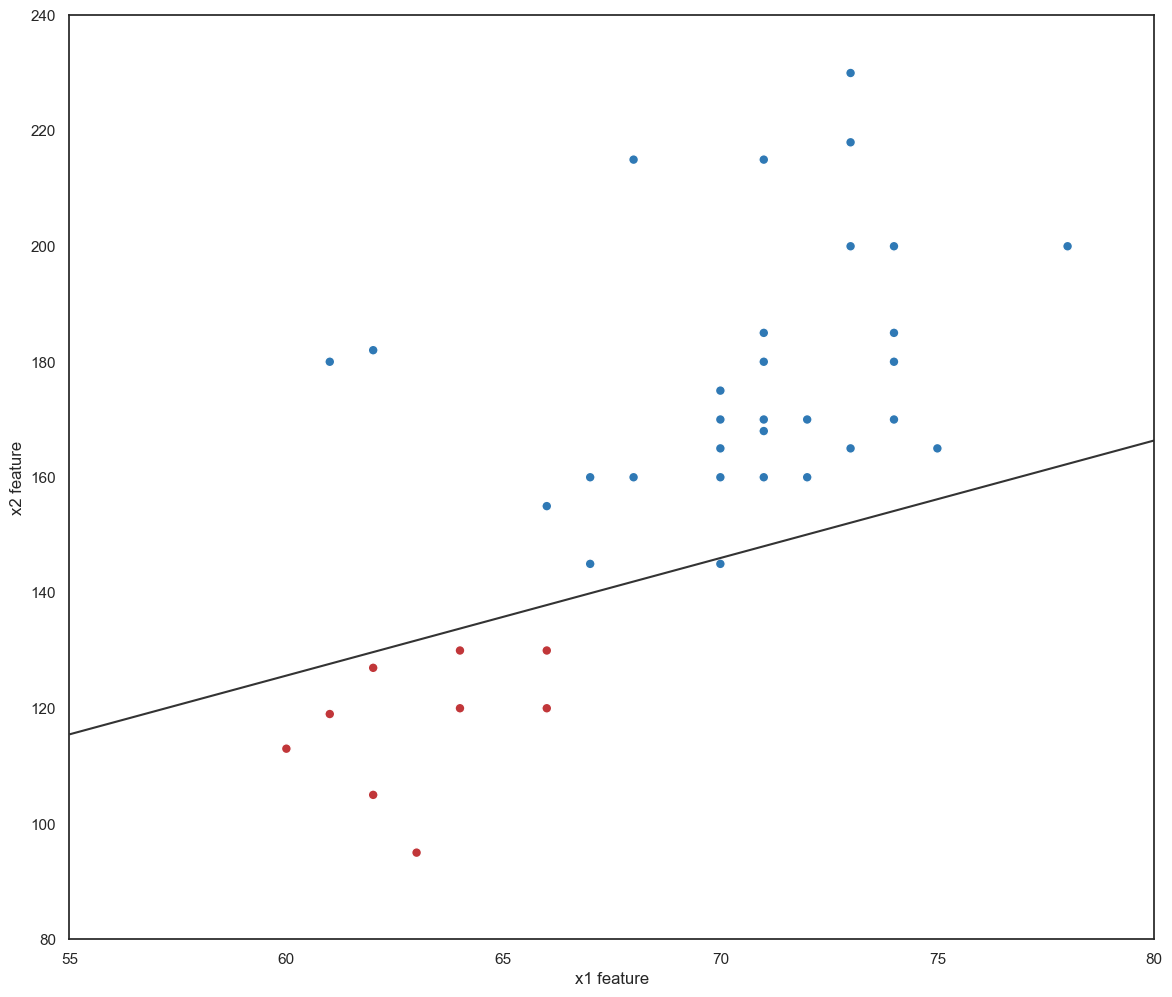

In [14]:
# Training the model and evaluating on test data after removing points 1 and 39
print("\nResults after removing points 1 and 39:")
train_metrics_removed = lr.run_model(remove_points=[1, 39])
print()
print("Train Metrics (after removing points):", train_metrics_removed[:3])
print("Test Metrics (after removing points):", train_metrics_removed[3:])

print()
print('Plots for Train Dataset(removing points)')
print()      
lr.plot()
lr.plot3D()
lr.scatterPlt()


#### (2) Plots for Test Dataset(removing points)


Plots for Test Dataset(removing points)



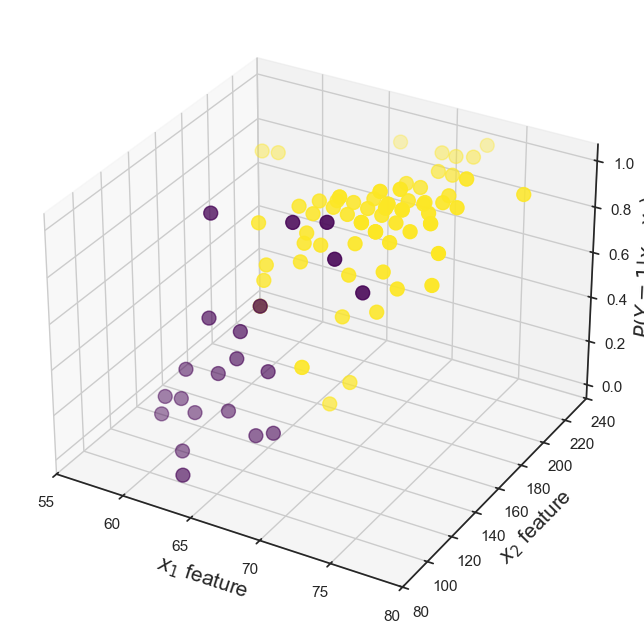

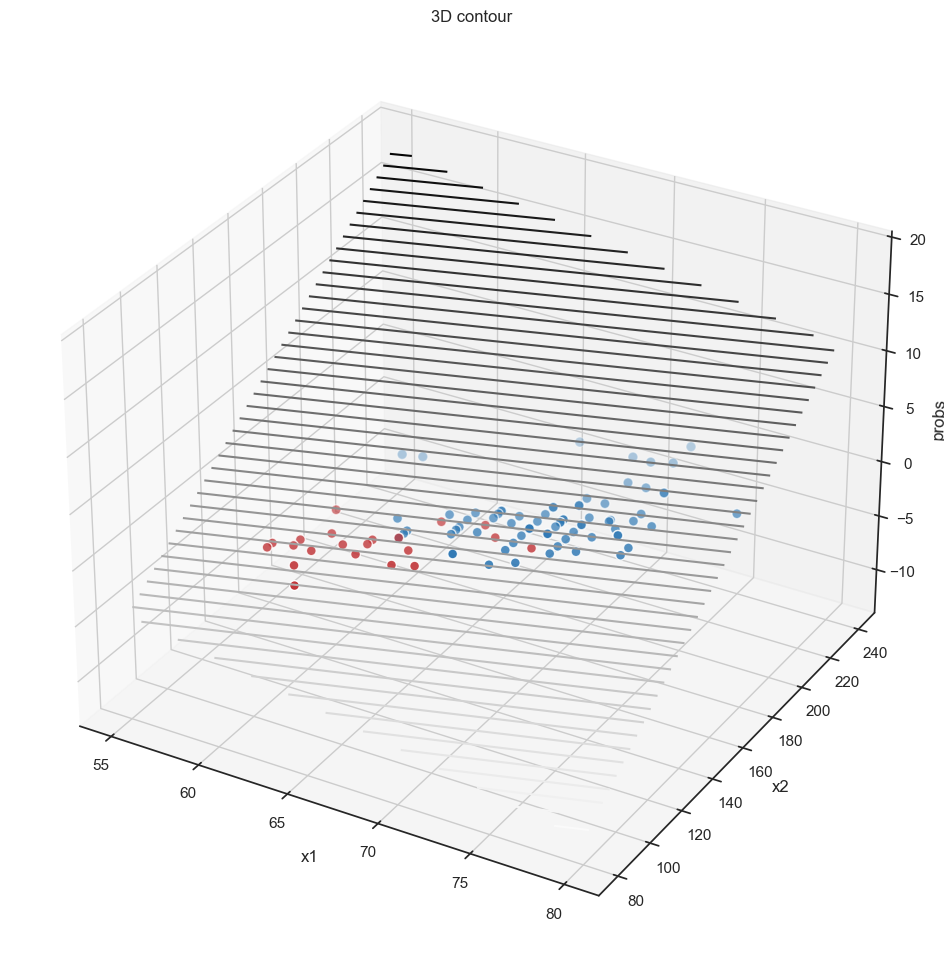

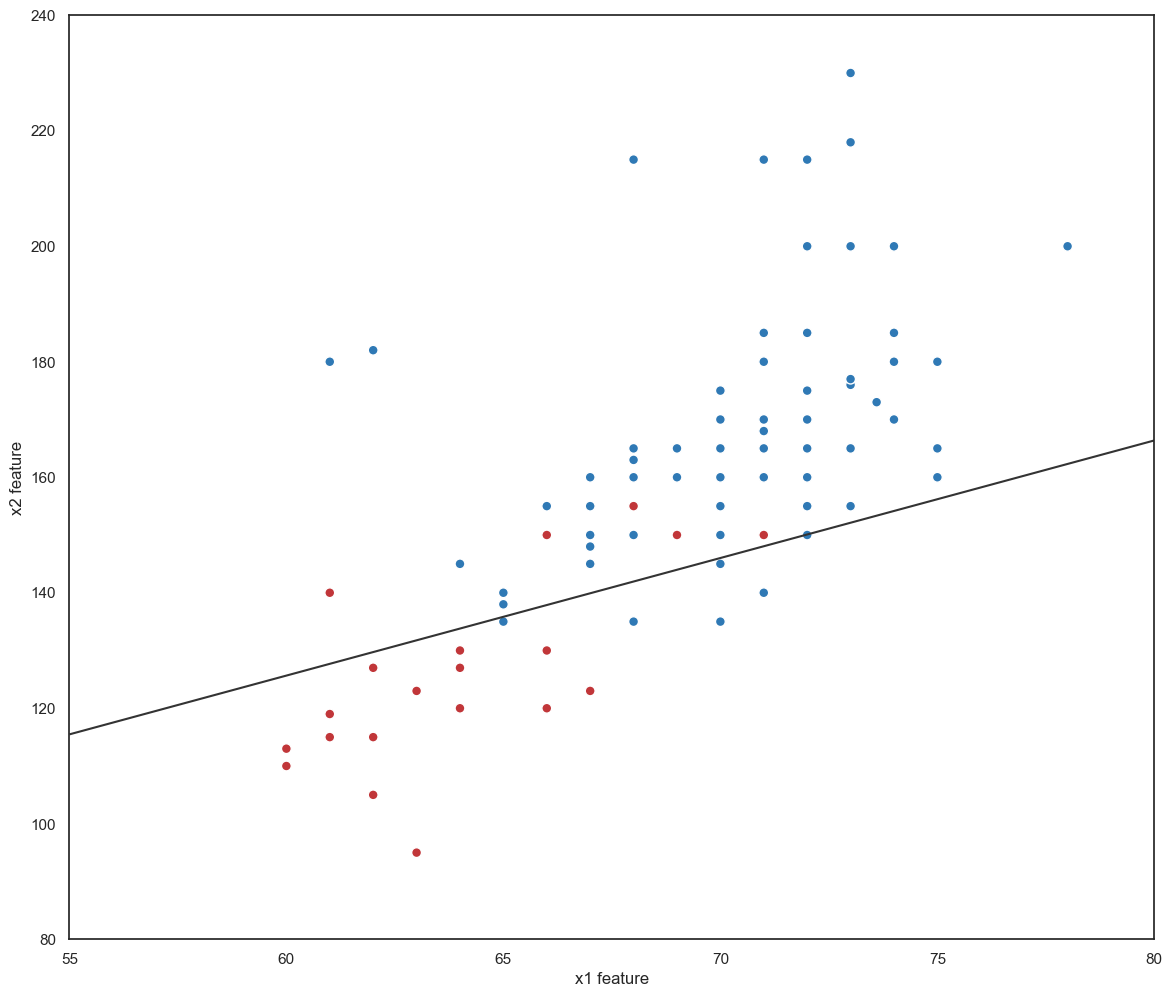

In [15]:
print()
print('Plots for Test Dataset(removing points)')
print()      
lr.plot_test()
lr.plot3D_test()
lr.scatterPlt_test()

### **Identifying the Impact:**
##### When we removed data points 1 and 39, we observed a significant improvement in the model's performance metrics. Specifically, the accuracy, precision, and recall of the model increased noticeably after removing these points. This improvement indicates that the model became more effective at correctly classifying instances in the dataset.

### **Analyzing the Misclassification:**
##### Data points 1 and 39 likely had a large effect on the model's predictions due to their positions in the feature space and their influence on the decision boundary. These points might have been outliers or located in regions where the data distribution was complex. As a result, the model may have struggled to correctly classify them, leading to misclassifications and lower performance metrics.

### **Generalization and Model Performance:**
##### Removing outliers or misclassified points like data points 1 and 39 can improve the model's generalization ability by reducing the likelihood of overfitting. Overfitting occurs when a model learns to capture noise or outliers in the training data, resulting in poor performance on unseen data. By removing these points, the model becomes less sensitive to noise or anomalies in the training data, allowing it to generalize better to new, unseen data.

##### However, it's noteworthy that the test dataset's performance didn't show a significant improvement after removing these points. This suggests that while the model became more robust on the training data, its ability to generalize to unseen data might not have improved as expected. Further analysis and refinement of the model may be necessary to achieve better generalization performance and mitigate overfitting issues.
